# XPRESStools Notebook 
- This test notebook can be used to perform analysis on a dataset.   
- Follow the instructions above each code block to know when and how to modify aspects of the analysis    
- A block of code can be executed in Jupyter notebook by selecting the block and pressing Shift + Enter
- IMPORTANT: If you re-run a previous block of code, already created variables are stored, so it important to run this linearly    
- Please refer to the [documentation](https://xpresstools.readthedocs.io/en/latest/) for further instructions

# Preparing Data

### Variables
- Modify variables such as data path, file names, etc here.  
- More information on how custom datasets should be formatted can be found [here](https://xpresstools.readthedocs.io/en/latest/content/general-usage.html)

In [1]:
#If running a GEO dataset, modify the section within quotes for this variable
geo_access = 'GSE20916'

#If running a custom dataframe and , modify the file paths and names within quotes for these variable
custom_data = '/Users/jordan/Desktop/test_data/GSE120202_NRDE2_KD_Total-1_and-2.txt'
custom_meta = '/Users/jordan/Desktop/test_data/GSE120202_meta.txt'

#Modify this path to specify output location 
#IMPORTANT: this path must end with a forward slash character as shown below
output_path = '/Users/jordan/Desktop/test_data/'

### Import libraries 
- XPRESStools can be installed by executing ```pip install xpresstools``` in the command line   
- The ```%matplotlib inline``` command allows figures to be displayed inline in Jupyter notebook

In [2]:
import os
import pandas as pd 
import numpy as np
import xpresstools as xp
%matplotlib inline

### Option 1: Initializing GEO data
- If accessing a GEO <u>microarray</u> dataframe, run the below line of code without modification

In [3]:
data, metadata = xp.get_geo(geo_access, output_path=output_path)

15-Mar-2019 15:06:54 DEBUG utils - Directory /Users/jordan/Desktop/test_data/ already exists. Skipping.
15-Mar-2019 15:06:54 INFO GEOparse - File already exist: using local version.
15-Mar-2019 15:06:54 INFO GEOparse - Parsing /Users/jordan/Desktop/test_data/GSE20916_family.soft.gz: 
15-Mar-2019 15:06:54 DEBUG GEOparse - DATABASE: GeoMiame
15-Mar-2019 15:06:54 DEBUG GEOparse - SERIES: GSE20916
15-Mar-2019 15:06:54 DEBUG GEOparse - PLATFORM: GPL570
/anaconda3/lib/python3.6/site-packages/GEOparse/GEOparse.py:84: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

15-Mar-2019 15:06:55 DEBUG GEOparse - SAMPLE: GSM523242
15-Mar-2019 15:06:56 DEBUG GEOparse - SAMPLE: GSM523243
15-Mar-2019 15:06:56 DEBUG GEOparse - SAMPLE: GSM523244
15-Mar-2019 15:06:56 DEBUG GEOparse - SAMPLE: GSM523245
15-Mar-2019 15:06:56 DEBUG GEOparse - SAMPLE: GSM523246
15-Mar-2019 15:06:56 DEBUG GEOparse - SAMPLE: GSM523247
15-Mar-2019 15:06:56 DEBUG GEOparse - SAMPLE: 

15-Mar-2019 15:07:03 DEBUG GEOparse - SAMPLE: GSM523378
15-Mar-2019 15:07:03 DEBUG GEOparse - SAMPLE: GSM523379
15-Mar-2019 15:07:03 DEBUG GEOparse - SAMPLE: GSM523380
15-Mar-2019 15:07:03 DEBUG GEOparse - SAMPLE: GSM523381
15-Mar-2019 15:07:03 DEBUG GEOparse - SAMPLE: GSM523382
15-Mar-2019 15:07:03 DEBUG GEOparse - SAMPLE: GSM523383
15-Mar-2019 15:07:03 DEBUG GEOparse - SAMPLE: GSM523384
15-Mar-2019 15:07:03 DEBUG GEOparse - SAMPLE: GSM523385
15-Mar-2019 15:07:04 DEBUG GEOparse - SAMPLE: GSM523386


Data processing summary:
{'Cell intensity files were generated using GCOS (Affymetrix). The probe set data was generated using R/BioConductor (version 2.8.1) packages affy (version 1.20.2), gcrma (version 2.14.1), and FLUSH.LVS.bundle (version 1.2.1, proportion=0.6). For data filtration, we selected the probe sets with signal intensity above the threshold limit in at least 5% of samples. The threshold was established at the 98th percentile of the expression levels from Y-chromosome–linked probe set signals detected detectable in female samples. In addition, the probe sets with signal FC higher than 1.5 (in relation to median) in less than 6 samples were removed.', 'Cell intensity files were generated using GCOS (Affymetrix). The probe set data was generated using R/BioConductor (version 2.8.1) packages affy (version 1.20.2), gcrma (version 2.14.1), and FLUSH.LVS.bundle (version 1.2.1, proportion=0.6). For data filtration, we selected the probe sets with signal intensity above the thres

### Option 2: Initializing custom data
- If using your own data and metadata, run the below code block without modification (assuming files were previously formatting [correctly](https://xpresstools.readthedocs.io/en/latest/content/general-usage.html))   
- If using a GEO imported RNA-seq dataset, it is important that the column names are the GSM identifiers and the metadata is formatted as usual.
    - In this example, the input file is tab-delimited, so we are adding the appropriate arguments to the function
    - The metadata columns are already properly ordered, so no additional arguments need to be added
    - Refer to the [documentation](https://xpresstools.readthedocs.io/en/latest/) for further instructions on modifying these commands

In [ ]:
data = xp.get_df(custom_data, delimiter='\t')
metadata = xp.get_info(custom_meta)

### Clean up the data
- For this dataset, we only want to compare normal colon and adenomous colon expression, so we create a dataframe with just those samples and run a basic clean-up function to remove Null values, etc.   
- Print functions have also been included to show the size of the dataframe before and after this code block is run

In [4]:
#Get normal and adenoma samples
data = xp.keep_labels(data, metadata, label_list=['normal_colon','adenoma'])

#Clean up dataset
data = xp.clean_df(data)

#Print some info
print('Dataframe size before cleaning: ' + str(data.shape))
print('Dataframe size after cleaning: ' + str(data.shape))

Dataframe size before cleaning: (21715, 69)
Dataframe size after cleaning: (21715, 69)


### Collapse MicroArray probes
- By nature of a microarray sequencing experiment, there are often multiple probes designed per gene. Additionally there may be probes that recognize several transcripts
- The following block will collapse these gene probes to a single representative gene measure by averaging measures across probes per sample. It will also remove multi-mapping probes
- In order to perform this step, a microarray platform reference is required. The table can usually be found within your GEO dataset webpage under the "platform" section where it will link you to a full table for download

In [5]:
#Location of GPL reference file
gpl_ref = '/Users/jordan/Desktop/test_data/GPL570.txt'

In [6]:
data = xp.probe_collapse(data, gpl_ref)

### Sample Normalization (RNA-seq)
- If running MicroArray data, signal must be normalized using a software tool such as Alt Analyze
- If running an RNAseq dataset, samples need to be normalized based on the number of reads in each
    - See the [documentation](https://xpresstools.readthedocs.io/en/latest/content/normalize.html) for more information
    - The code blocks below will perform RPKM normalization on single-end read RNAseq data
    - The first of these code blocks will set the variable for the location and file name of the appropriate [Ensembl GTF reference file](https://uswest.ensembl.org/index.html)
- GTF file format will vary slightly from organism to organism, and at times the character sequence needed to be searched will vary. More information can be found in the [documentation](https://xpresstools.readthedocs.io/en/latest/content/normalize.html)
- If samples were sequenced in multiple batches, it is recommended using XPRESStools's [batch_normalize](https://xpresstools.readthedocs.io/en/latest/content/normalize.html#batch-normalize) function

In [ ]:
#Location and filename of GTF reference file
gtf = '/Users/jordan/Desktop/test_data/transcript_reference.gtf'

In [ ]:
data = xp.r_fpkm(data,gtf)

### Gene Scaling
- For many analyses, it is important that genes be scaled similarly in order to make their comparison compatible
- XPRESStools will perform standard scaling on gene data. This will result in each gene having a mean=0 and a standard deviation=1

In [7]:
data_scaled, data_labeled = xp.prep_data(data, metadata) 

### Perform quality control check of data 
- For samples to be comparable to one another, they should have comparable distributions of gene expression. This can be checked by running the following command   
- As we can see from the GSE20916 example after removing all sample types but normal and adenomous colon, the means and distributions across all samples are relatively similar

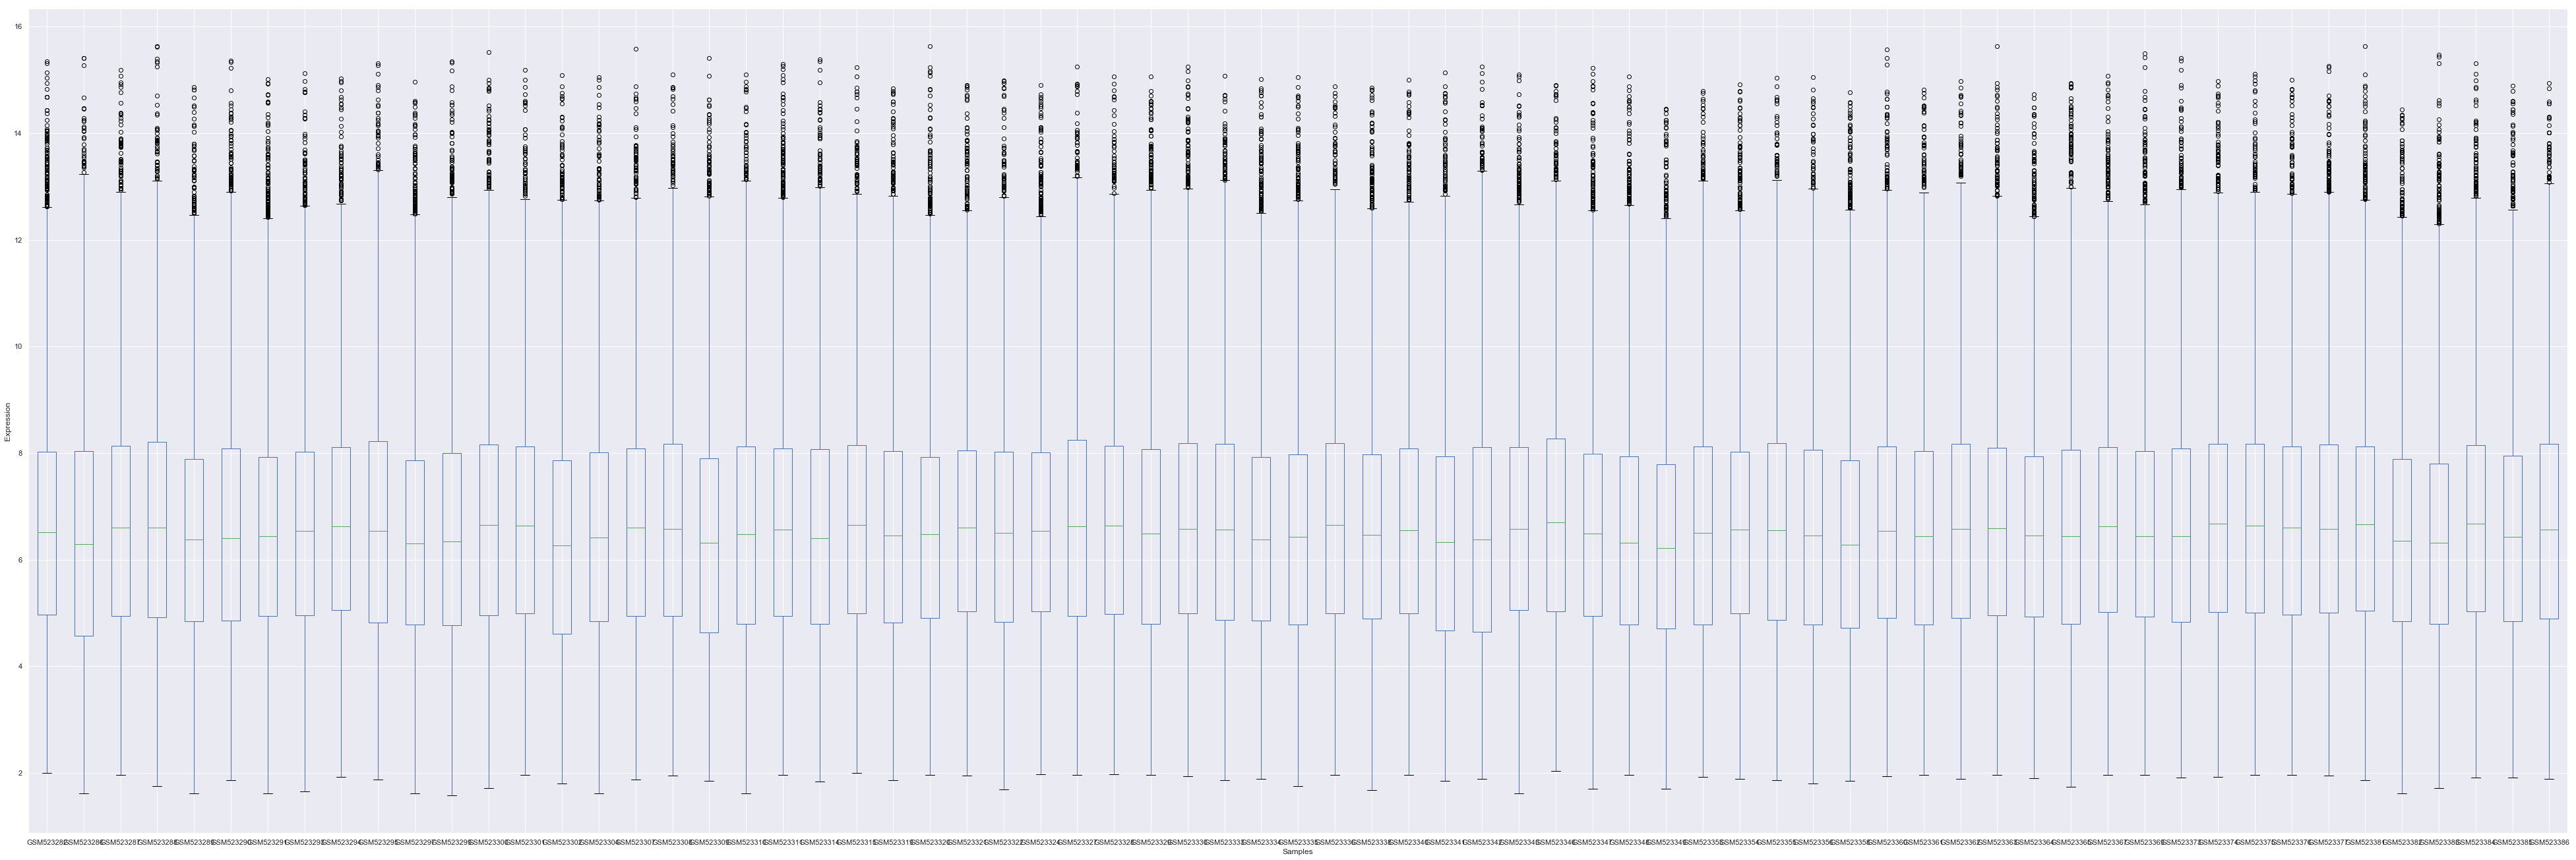

In [8]:
xp.check_samples(data)

### Prepare plotting features
- XPRESStools often gives one the option to color by sample type. Doing so requires a color palette dictionary, like the one below
- Colors can be specified using common names or using another Matplotlib-compatible format

In [9]:
colors = {'adenoma': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
        'normal_colon': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275)}

# Analyzing Data

### Single-gene analysis
- Use: Explore how expression of a particular gene varies across sample types

<u><b>Plot data</b></u>
- In the example below, we use the previous data and metadata, along with the corresponding color palette
- In this example we will look at how expression of <b>MPC1</b>, a componenent of the mitochondrial pyruvate carrier which transports the metabolite pyruvate into the mitochondria to participate in the TCA cycle
- In this example, we have also added the ```order``` argument to ensure samples are ordered as we wish

<Figure size 432x288 with 0 Axes>

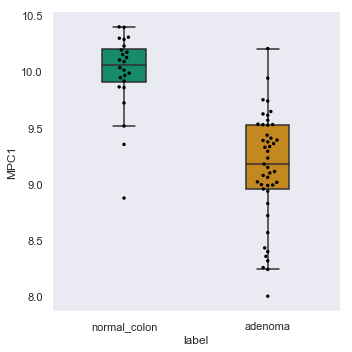

In [10]:
xp.gene_overview(data, metadata, 'MPC1', colors, order=['normal_colon','adenoma'])

### Multi-gene analysis
- Use: Explore expression of a sub-set of genes of interest

<u><b>Generate gene lists</b></u>
- Gene lists can be imported or specified as a variable for later use
- This list can be modified to fit the user's specific needs

In [11]:
genes = '/Users/jordan/Desktop/test_data/notch_genes.csv'
genes = pd.read_csv(genes, header=None)
genes = genes[0].tolist()

- Or a list of gene names can be manually provided
- We chose the lactate dehydrogenase genes available in this dataset that are annotated as cytosolic

In [12]:
genes = ['LDHA','LDHB']

<u><b>Plot data</b></u>
- Next, we'll perform multi-gene analysis on a subset of genes we think might be interesting in the context of colon cancer
- In this example we will explore the expression of the genes required to form the HoxD
- It is recommended that <b>genes are uniformly scaled</b> in order to make their expression levels cross-compatible
- Lactate dehydrogenase gene products convert pyruvate to lactate and appear to show sligh up-regulation. As the mitochondrial pyruvate carrier appears to be downregulated, this makes sense, as the complex will decrease import of pyruvate into the mitochondria and lead to accumulations in the cytosol

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



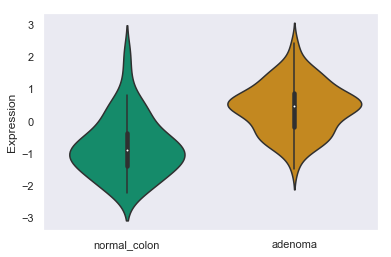

In [13]:
xp.multigene_overview(data_scaled, metadata, 
                      palette=colors,
                      gene_list=genes)

### Heatmaps
- Use: Compare a gene cohort or all genes across samples to identify expression patterns

<u><b>Prepare gene labels metadata</b></u>
- In this example, we will supply the sample metadata, as well as gene metadata to label the gene axis

In [14]:
#Set gene group color palette
gene_colors = {'LDH': (0.5725490196078431, 0.5843137254901961, 0.5686274509803921),
                'MPC': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549)}

#Create gene group metadata
gene_groups = np.array([['LDHA','LDH'],
                  ['LDHB','LDH'],
                  ['MPC1','MPC'],
                  ['MPC2','MPC']])
gene_groups = pd.DataFrame({0:gene_groups[:,0],1:gene_groups[:,1]})

<u><b>Plot data</b></u>
- From this analysis, it appears that the LDH genes and the MPC genes cluster together and that these two sets of genes alone are able to cluster normal versus adenomous tissue fairly well

<Figure size 432x288 with 0 Axes>

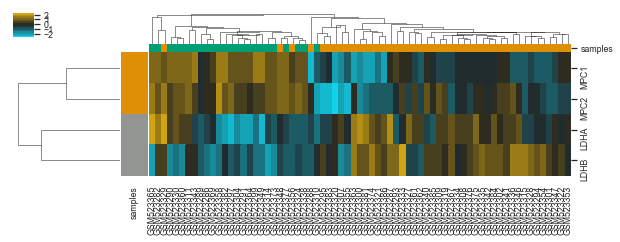

In [15]:
xp.heatmap(data_scaled, metadata, 
           sample_palette=colors, 
           gene_palette=gene_colors, gene_info=gene_groups, 
           gene_list=['LDHA','LDHB','MPC1','MPC2'], 
           row_cluster=True, col_cluster=True,
           figsize=(10,3))

# Scatter Plots and Linear Regression
- Use: Plot two arrays data, such as the expression of two genes from the dataset and determine if there is a linear relationship between the two arrays 

<u><b>Plot data</b></u>
- From the previous example, it appears there is a fairly anti-correlary relationship between MPC and LDH. We would now like to quantify this relationship between two of the genes
- The linear regression states that the relationship has an r-value=```-0.48```, confirming our hypothesis of a anti-correlary relationship. The value of ```0.48``` indicates a moderate level of correlation

<Figure size 432x288 with 0 Axes>

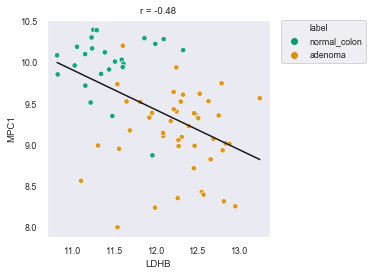

In [16]:
xp.scatter(data, metadata, 'LDHB', 'MPC1', 
           palette=colors, 
           add_linreg=True,
           alpha=0.9,
           figsize=(4,4))

### Volcano Plots
- Use: Plot the log<sub>2</sub>(Fold Change) and -log<sub>10</sub>(P-values) for each gene between the two sample types to determine differentially expressed genes in the dataset. Also allows the user to highlight a specific group of genes and label the points

<u><b>Plot data</b></u>
- From this analysis, while the changes in these genes are significant, they are perhaps not very large changes in expression
- Labeling the highlighted points is a two step process, as outlined in the code blocks below

<Figure size 432x288 with 0 Axes>

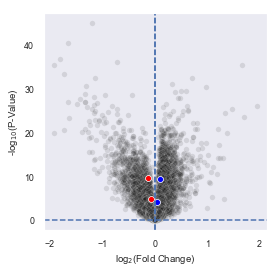

In [17]:
#We'll use this step to get the gene coordinates
xp.volcano(data, metadata, 
           'adenoma', 'normal_colon', 
           highlight_points=[['LDHA','LDHB'],['MPC1','MPC2']],
           highlight_color=['blue','red'], 
           alpha=.1, y_threshold=0, x_threshold=[-0,0],
           save_threshold_hits=str(output_path + 'test_hits.csv'), #we output the all hits to get the values we want 
           figsize=(4,4))                                          #to plot
           

<Figure size 432x288 with 0 Axes>

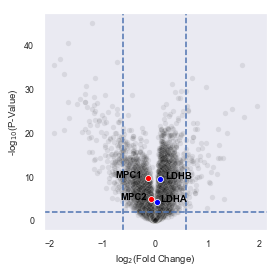

In [18]:
#Now we can incorporate the gene coordinates to output a final, labeled volcano plot
xp.volcano(data, metadata, 
           'adenoma', 'normal_colon', 
           highlight_points=[['LDHA','LDHB'],['MPC1','MPC2']],
           highlight_color=['blue','red'], 
           alpha=.08, y_threshold=2, x_threshold=[-.6,.6],
           label_points={'MPC1':[-0.75,9.777946709], #we need to modify these points slightly from 
                        'MPC2':[-0.65,4.842671456],  #the output coordinates to avoid overlapping 
                        'LDHA':[0.1,4.257609371],  #labels
                        'LDHB':[0.2,9.574628532]},
           figsize=(4,4))

- We can look at what hits are significant (fold change > 1.5, p-value < 0.01) and output those by specifying thresholds and an output file
- Interestingly, one of these hits is LGR5, a known intestinal cell marker and over-regulation has been [correlated with poor survival in colon cancer](https://www.ncbi.nlm.nih.gov/pubmed/24063790)
- Another hit, GCG, is known to play a role in hyperglycemia, which has been [shown to be a risk factor for cancer progresssion](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4209346/)

<Figure size 432x288 with 0 Axes>

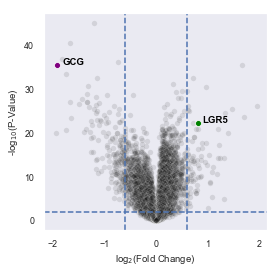

In [19]:
xp.volcano(data, metadata, 
           'adenoma', 'normal_colon', 
           alpha=.1, y_threshold=2, x_threshold=[-0.6,0.6],
           save_threshold_hits=str(output_path + 'test_hits.csv'),
           highlight_points=[['GCG'],['LGR5']],
           highlight_color=['purple','green'], 
           label_points={'GCG':[-1.8,35.59759851],
                        'LGR5':[0.9,22.31221513]},
           figsize=(4,4))

# Principle Component Analysis
- Use: Deconvolute high-dimensional data

<u><b>Prepare gene set</b></u>
- Let's see how sufficient a gene cluster's expression levels are to delineate different sample types

In [20]:
genes = '/Users/jordan/Desktop/test_data/wnt_genes.csv'
genes = pd.read_csv(genes, header=None)
genes = genes[0].tolist()

<u><b>Plot data</b></u>
- Let's plot the gene subset

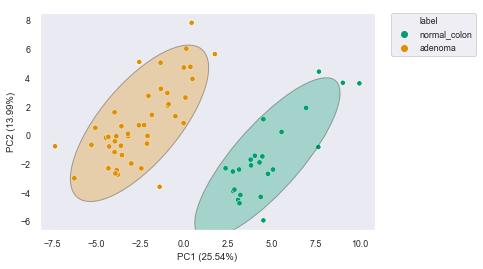

In [21]:
xp.pca(data_scaled, metadata, colors, 
       gene_list=genes,
       grouping='samples', #this indicates we want to compare samples
       figsize=(4,4))

- We can also consider all gene expression to see how it delineates sample type
- In this case, it looks like gene expression alone is enough to cluster these samples (good thing, since they one type is cancer and the other is normal!)

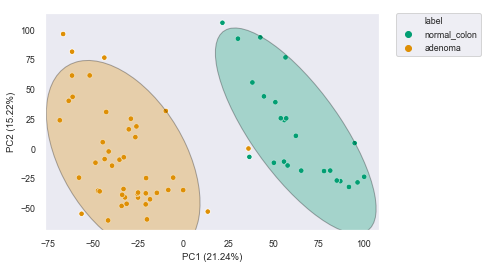

In [22]:
xp.pca(data_scaled, metadata, colors, 
       figsize=(4,4))